In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

from src.data_prep import *

plt.style.use('ggplot')
%matplotlib inline

## Data Preparation 

In [455]:
#Reading in the data
data = pd.read_pickle('../junyi_df.pickle')

#Dropping Un-needed Columns
data = drop_columns(data)

#Changing Bools to Int
data = change_bool(data)

#Convert Unix datetime to DateTime
convert_dates(data, 'time_done')

#Choosing Date Range
data = select_date(data, 'time_done', '1/1/2014', '9/30/2014')


In [471]:
data.head(3)

,user_id,topic_mode,suggested,review_mode,time_done,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
1,239464,0,0,0,2014-06-18 13:33:20.836660,2,1,1,0,0,0,14
3,158155,0,0,0,2014-05-19 03:17:24.264040,2,1,1,0,0,0,75
5,135350,0,1,0,2014-02-19 08:46:32.220080,9,1,1,0,0,0,225


## Creating the Users Table 

In [194]:
#Creating User Table with sums of data points
users = data.groupby('user_id').sum()

user_table = pd.DataFrame(users)

#Creating a time variable rng
user_time = data.groupby('user_id')
rng = (user_time['time_done'].max() - user_time['time_done'].min()).dt.days

#Cutting Table to include only users with 10 or more days active
user_table = user_table[(rng>9)]

#Creating Squared Hints, Correct, Review_Mode(Unused in final )
    # user_table['count_hints_sq'] = user_table['count_hints'] **2 
    # user_table['count_attempts_sq'] = user_table['count_attempts'] **2 
    # user_table['review_mode_sq'] = user_table['review_mode'] **2
    # user_table['correct_sq'] = user_table['correct'] **2

#Creating a More than 10 activities columns
total_usage = data['user_id'].value_counts().sort_index()
user_table['total_usage'] = total_usage


#Unused in final table
    #user_table['more_than_100_activities'] = (total_usage > 100).astype(int)
    #user_table['more_than_1000_activities'] = (total_usage > 1000).astype(int)
    #user_table['more_than_ten_activities'] = (total_usage > 10).astype(int)

#Creating a More than X day columns
user_time = data.groupby('user_id')
rng = (user_time['time_done'].max() - user_time['time_done'].min()).dt.days

#The columns below did not end up in the final table
    #user_table['active_more_than_1_day'] = (rng > 0).astype(int)
    #user_table['active_at_least_5_days'] = (rng >= 4).astype(int)
    #user_table['active_at_least_10_days'] = (rng >= 9).astype(int)

active_from_last= (data['time_done'].max() - (user_time['time_done'].max())).dt.days
user_table['active_from_last'] = active_from_last

#active_from_last_sq = active_from_last ** 2
#user_table['active_from_last_sq'] = active_from_last_sq



#Creating a 7 day streak columns
one_before = ((data['time_done'].max())- timedelta(1))
two_before = ((data['time_done'].max())- timedelta(2))
three_before = ((data['time_done'].max())- timedelta(3))
four_before = ((data['time_done'].max())- timedelta(4)) 
five_before = ((data['time_done'].max())- timedelta(5))
six_before =((data['time_done'].max())- timedelta(6))
seven_before =((data['time_done'].max())- timedelta(7))

user_table['one_before'] = ((one_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['two_before'] = ((two_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['three_before'] = ((three_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['four_before'] = ((four_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['five_before'] = ((five_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['six_before'] = ((six_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['seven_before'] = ((seven_before - (user_time['time_done'].max())).dt.days == 0).astype(int



### Creating the Target and Saving User Table 

In [481]:
target = create_target('../junyi_df.pickle', '10/1/2014', '10/31/2014', user_table)

In [ ]:
#Dropping if colums if needed before adding target and saving
    #user_table.drop(columns=['target'], inplace=True)
    #user_table.drop(columns=['active_at_least_10_days', 'active_at_least_5_days', 'active_more_than_1_day'], inplace=True)

In [480]:
user_table['target'] = target.values()
user_table.head(5)

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,total_usage,active_from_last,one_before,two_before,three_before,four_before,five_before,six_before,seven_before,target
user_id,,,,,,,,,,,,,,,,,,,,
8,147,81,0,1600,192,277,8,53,16,28843,230,80,0,0,0,0,0,0,0,0
9,73,20,0,2860,110,251,9,20,5,17122,150,29,0,0,0,0,0,0,0,0
52,996,417,128,28680,2926,3705,33,108,195,264204,3222,148,0,0,0,0,0,0,0,0
78,24,10,0,1630,81,171,13,49,2,6071,111,172,0,0,0,0,0,0,0,0
80,33,16,0,579,31,35,2,7,3,5787,34,35,0,0,0,0,0,0,0,1


In [427]:
user_table.columns

Index(['topic_mode', 'suggested', 'review_mode', 'time_taken', 'correct',
       'count_attempts', 'hint_used', 'count_hints', 'earned_proficiency',
       'points_earned', 'more_than_ten_activities', 'more_than_100_activities',
       'more_than_1000_activities', 'active_from_last', 'sum_attempts',
       'one_before', 'two_before', 'three_before', 'four_before',
       'five_before', 'six_before', 'seven_before', 'total_usage', 'target'],
      dtype='object')

In [469]:
#Save table and make sure to change version
# For testing set, choose slice of data and follow same steps

user_table.to_csv('../users_final.csv')

### Plotting each feature against the target  

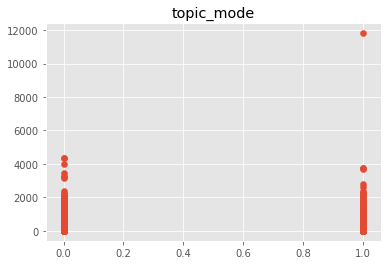

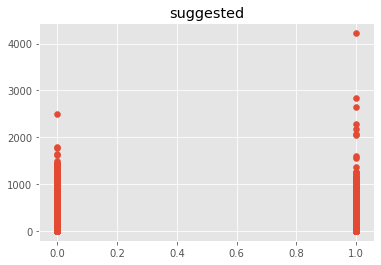

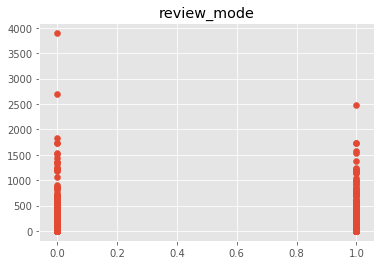

In [ ]:
for col in list(user_table.columns.values): 
    fig, ax = plt.subplots()
    ax.scatter(user_table['target'], user_table[col])
    ax.set_title(col)
